# Introduction

In this notebook, we will train a neural network using Tensorflow to classify clothing images.
[Reference](https://www.tensorflow.org/tutorials/keras/classification)

We will be using the Animal data in this notebook

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
#handles various images operations
import os
#Instantly make your loops show a smart progress meter
from tqdm import tqdm

Data contains 90 animal categories and 60 images for each category

# Load the data

In [2]:
file = open("animals.txt")
file_contents = file.read()
animals_dataset = file_contents.splitlines()
print(animals_dataset)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


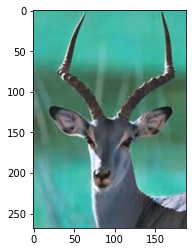

In [3]:
DATADIR = "animals/animals/"

for category in animals_dataset:  # folder names are the categories
    path = os.path.join(DATADIR, category)  # create path to animals
    class_num = animals_dataset.index(category) # get the classification  (0 .. 89). 0=antelop 1=..
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [12]:
print(img_array)

[[166 166 165 ... 165 165 166]
 [166 166 165 ... 165 165 166]
 [166 166 165 ... 165 165 166]
 ...
 [167 167 166 ...  58  65  67]
 [167 167 166 ...  62  69  71]
 [167 167 167 ...  65  72  74]]


basically images will have different shapes because they have different sizes 

In [13]:
print(img_array.shape)

(268, 188)


The images have to be resized to one size this can be changed for best quality with enough visibility but least size

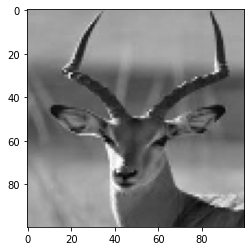

In [16]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [22]:
training_data = []

def create_training_data():
    for category in animals_dataset: 

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = animals_dataset.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                # resize to normalize data size
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                # add this to our training_data
                training_data.append([new_array, class_num]) 
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 153.02it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 145.66it/s]

5400


In [14]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print("Training data: {}".format(train_images.shape))
print("Training data: {}".format(test_images.shape))

Training data: (60000, 28, 28)
Training data: (10000, 28, 28)


Labels from the API are numerical only, we define class labels for data visualisation

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
pd.DataFrame({'Label': np.unique(train_labels), 'Class': class_names}, index=None)

,Label,Class
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


Read in the class from animals.txt and create map with int keys

In [28]:
dictOfAnimals = {i : contents_split[i]  for i in range(0, len(contents_split) )}
print(dictOfAnimals)

{0: 'antelope', 1: 'badger', 2: 'bat', 3: 'bear', 4: 'bee', 5: 'beetle', 6: 'bison', 7: 'boar', 8: 'butterfly', 9: 'cat', 10: 'caterpillar', 11: 'chimpanzee', 12: 'cockroach', 13: 'cow', 14: 'coyote', 15: 'crab', 16: 'crow', 17: 'deer', 18: 'dog', 19: 'dolphin', 20: 'donkey', 21: 'dragonfly', 22: 'duck', 23: 'eagle', 24: 'elephant', 25: 'flamingo', 26: 'fly', 27: 'fox', 28: 'goat', 29: 'goldfish', 30: 'goose', 31: 'gorilla', 32: 'grasshopper', 33: 'hamster', 34: 'hare', 35: 'hedgehog', 36: 'hippopotamus', 37: 'hornbill', 38: 'horse', 39: 'hummingbird', 40: 'hyena', 41: 'jellyfish', 42: 'kangaroo', 43: 'koala', 44: 'ladybugs', 45: 'leopard', 46: 'lion', 47: 'lizard', 48: 'lobster', 49: 'mosquito', 50: 'moth', 51: 'mouse', 52: 'octopus', 53: 'okapi', 54: 'orangutan', 55: 'otter', 56: 'owl', 57: 'ox', 58: 'oyster', 59: 'panda', 60: 'parrot', 61: 'pelecaniformes', 62: 'penguin', 63: 'pig', 64: 'pigeon', 65: 'porcupine', 66: 'possum', 67: 'raccoon', 68: 'rat', 69: 'reindeer', 70: 'rhinocero

In [31]:
animals_Labels = pd.DataFrame(list(dictOfAnimals.items()), columns=['Label', 'Class'], index=None)
print(animals_Labels)

    Label       Class
0       0    antelope
1       1      badger
2       2         bat
3       3        bear
4       4         bee
..    ...         ...
85     85       whale
86     86        wolf
87     87      wombat
88     88  woodpecker
89     89       zebra

[90 rows x 2 columns]


Normalising image data between 0 and 1

In [15]:
train_images = train_images / 255
test_images = test_images / 255

Visualising samples from training set

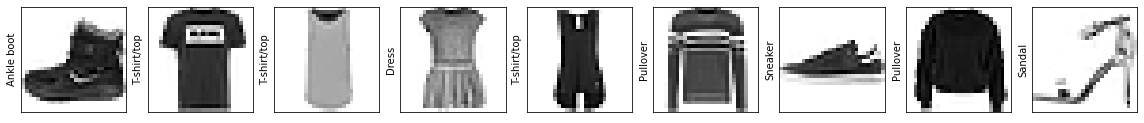

In [127]:
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.ylabel(class_names[train_labels[i]])
plt.show()

# Building the model

In [180]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


* **Flatten layer** converts the 2D array to a 1D array (28 x 28 = 784 dimensions)
* **Dense layer** deeply connects with its preceding layer, i.e. all neurons of the layer are connected to every neuron of its preceding layer. Neurons in the deep layer receiv output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication.
* One Dense layer with **128 nodes**
* One Dense layer with **10 nodes** which returns an array of length 10. Each node contains a score indicating the current images' probability of belong to each of the classes 

## Compliling and Training

In [181]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics = ['accuracy'])

* We use **SparseCategoricalCrossentropy** loss function because there are more than two label classes and the labels are integers.
* We could use **CategoricalCrossentropy** loss function as well in this case, but the labels would have to be one_hot encoded

In [182]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 836us/step - loss: 0.6356 - accuracy: 0.7787
Epoch 2/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.3850 - accuracy: 0.8620
Epoch 3/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.3433 - accuracy: 0.8740
Epoch 4/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.3117 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.2870 - accuracy: 0.8955
Epoch 6/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.2841 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.2691 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2572 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 2s 873us/step - loss: 0.2439 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 2s 885us/

## Evaluate

In [183]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Validation Loss: {}, Validation Accuracy: {}".format(test_loss, test_accuracy))

313/313 [==============================] - 0s 658us/step - loss: 0.3437 - accuracy: 0.8809
Validation Loss: 0.34370264410972595, Validation Accuracy: 0.8809000253677368


We use Softmax layer to generate normalised probabilities for better comprehension and interpration

In [65]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

## Visualisation

In [159]:
def plot_image(i, predictions_array, true_label, img):
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#7d4646")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

The Flatten layer expects the input for its layer in the form of (batch, .... channel_last) or (batch, channel_first, ....), so we need to transform each image so that we have the batch size mentioned with the input as well. Our input shapefor each image will then become (1, 28, 28)

T-shirt/top


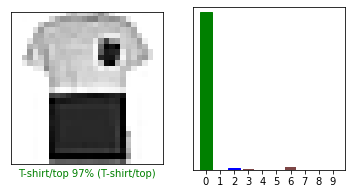

In [160]:
i = 120

# Prediction
image = tf.convert_to_tensor(test_images[i])
image_batch = tf.expand_dims(image, [0])
prediction = probability_model.predict(image_batch)
print(class_names[np.argmax(prediction)])

# Plotting
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[0], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, prediction[0],  test_labels[i])
plt.show()

## Overcoming Overfitting

In the first model we notice overfitting, which is evident from the fact that the accuracy on the test dataset is a little less than the accuracy on the training dataset. We use L2 regularization and Dropout to overcome that

In [210]:
combined_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
])

In [211]:
combined_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics = ['accuracy'])
combined_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 983us/step - loss: 0.6974 - accuracy: 0.7658
Epoch 2/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.4437 - accuracy: 0.8501
Epoch 3/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.4135 - accuracy: 0.8625
Epoch 4/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.4044 - accuracy: 0.8683
Epoch 5/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.3953 - accuracy: 0.8722
Epoch 6/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.3918 - accuracy: 0.8735
Epoch 7/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.3830 - accuracy: 0.8772
Epoch 8/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.3691 - accuracy: 0.8791
Epoch 9/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.3731 - accuracy: 0.8817
Epoch 10/10
1875/1875 [==============================] - 2s 951u

In [212]:
combined_model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 898us/step - loss: 0.3981 - accuracy: 0.8762


[0.3980819284915924, 0.8762000203132629]